In [1]:
# refer to https://github.com/mlfoundations/open_clip/pull/860 and https://github.com/mlfoundations/open_clip/issues/847
# use older transfers to avoid this issue.
!pip install open_clip_torch transformers==4.37.0

DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.36ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import open_clip
import torch

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [4]:
from PIL import Image
im = Image.open("0.jpg").convert("RGB")
im = transform(im).unsqueeze(0)

In [5]:
with torch.no_grad(), torch.cuda.amp.autocast():
  generated = model.generate(im)

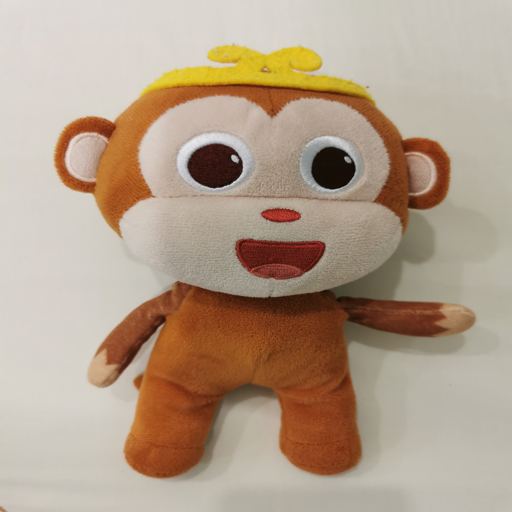

In [6]:
Image.open("0.jpg").convert("RGB").resize((512,512))

In [7]:
print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))

a stuffed monkey with a crown on it 's head . 
